In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.utils import shuffle
from sklearn.preprocessing import binarize
import scipy
import operator
import matplotlib.pyplot as plt
import copy
import pdb

In [2]:
data_train = pd.read_csv('data/train2.csv',index_col=0)

In [3]:
list_constant_attributes =['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 
                           'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 
                           'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 
                           'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 
                           'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 
                           'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 
                           'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 
                           'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 
                           'saldo_medio_var13_medio_hace3']

list_binary_attributes = ['ind_var1_0', 'ind_var1', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 
                          'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 
                          'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 
                          'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 
                          'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 
                          'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 
                          'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var29_0', 
                          'ind_var29', 'ind_var30_0', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var32_cte', 
                          'ind_var32_0', 'ind_var32', 'ind_var33_0', 'ind_var33', 'ind_var34_0', 'ind_var34', 
                          'ind_var37_cte', 'ind_var37_0', 'ind_var37', 'ind_var39_0', 'ind_var40_0', 'ind_var40', 
                          'ind_var41_0', 'ind_var39', 'ind_var44_0', 'ind_var44', 'num_var6_0', 'num_var6', 
                          'num_var8', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0', 'num_var18', 
                          'num_var20_0', 'num_var20', 'num_var29_0', 'num_var29', 'num_var34_0', 'num_var34', 
                          'num_var40', 'num_var39', 'num_var44', 'delta_imp_amort_var18_1y3', 
                          'delta_imp_amort_var34_1y3', 'delta_imp_reemb_var13_1y3', 
                          'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3', 
                          'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var13_1y3', 
                          'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_out_1y3', 
                          'delta_num_trasp_var33_out_1y3', 'imp_reemb_var17_hace3', 'imp_reemb_var33_ult1', 
                          'imp_trasp_var33_out_ult1', 'ind_var7_emit_ult1', 'ind_var7_recib_ult1', 
                          'ind_var10_ult1', 'ind_var10cte_ult1', 'ind_var9_cte_ult1', 'ind_var9_ult1', 
                          'ind_var43_emit_ult1', 'ind_var43_recib_ult1', 'num_var7_emit_ult1', 
                          'num_meses_var13_medio_ult3', 'num_reemb_var13_ult1', 'num_reemb_var17_hace3', 
                          'num_reemb_var33_ult1', 'num_trasp_var17_in_ult1', 
                           'num_trasp_var17_out_ult1', 'num_trasp_var33_in_hace3', 'num_trasp_var33_out_ult1', 
                          'saldo_medio_var29_hace3']

In [4]:
list_binary_attributes_with_target = copy.deepcopy(list_binary_attributes)
list_binary_attributes_with_target.append('TARGET')

In [5]:
print('Data train initial shape',data_train.shape)
data_train_drop_constant_colums = data_train.drop(list_constant_attributes,axis=1)
print('Data train new shape after dropping constant feature',data_train_drop_constant_colums.shape)
data_train_numeric_feature = data_train_drop_constant_colums.drop(list_binary_attributes,axis=1)
print('Data train new shape only numeric feature',data_train_numeric_feature.shape)
data_train_only_binary_feature = data_train_drop_constant_colums.loc[:,list_binary_attributes_with_target]

Data train initial shape (76020, 370)
Data train new shape after dropping constant feature (76020, 336)
Data train new shape only numeric feature (76020, 231)


In [6]:
matrix_binarized = binarize(data_train_only_binary_feature.as_matrix(),0)
data_train_only_binary_feature=pd.DataFrame(matrix_binarized, columns=data_train_only_binary_feature.columns)
print('Data train new shape only binary feature',data_train_only_binary_feature.shape)

Data train new shape only binary feature (76020, 106)


In [7]:
number_rounds = 3
test_size_value = 0.5
number_trees = 100

matrix_feature = data_train_only_binary_feature.as_matrix()[:,:-1]
labels = data_train_only_binary_feature.as_matrix()[:,-1]

# I am using an initial setting a this stage, then I will do a fine 
# tunning of the parameters.
classifier = RandomForestClassifier(n_estimators=number_trees, 
                                    max_features="sqrt")

f1_score_list = []
cm_list = []
cm_max_list = []

rounds = StratifiedShuffleSplit(n_splits=number_rounds, 
                                test_size=test_size_value,
                                random_state=0)

for train_index, test_index in rounds.split(matrix_feature,labels):
        matrix_train = matrix_feature[train_index]
        classes_train = labels[train_index]
        matrix_test = matrix_feature[test_index]
        classes_test = labels[test_index]
        classifier.fit(matrix_train,classes_train)
        classes_predicted = classifier.predict(matrix_test)
        cm = confusion_matrix(classes_test, classes_predicted,labels=[0,1])
        # normalize the confusion matrix
        cm= cm / cm.astype(np.float).sum(axis=1).reshape(-1,1)
        #this threshold is used for plotting 
        thresh = cm.max() / 2.
        cm_list.append(cm)
        cm_max_list.append(thresh)
        #I compute the score taking into account the weighted schema, 
        #which means weighted by the support (the number of true instances for each label)
        precision, recall, fscore, support = score(classes_test, 
                                                   classes_predicted,
                                                   average='macro')
        f1_score_list.append(fscore)



In [8]:
#The score method used in this case is the F1 score, which is the harmonic mean of precision and recall#The sc 
F1_accuracy_str="F1 accuracy: %0.3f (+/- %0.3f)" % (np.mean(f1_score_list),
                                                    np.std(f1_score_list) * 2)
F1_accuracy = np.mean(f1_score_list)
print(F1_accuracy_str)

F1 accuracy: 0.492 (+/- 0.002)


In [9]:

print('Extract (randomly) one confusion matrix (Real vs Prediction) from the previous run: ')
shuffle(cm_list,random_state=15)
cnf_matrix = cm_list[0]
dataframe=pd.DataFrame(cnf_matrix,index=['Real happy',' Real unhappy'],columns=['Predicted happy',' Predicted unhappy'])
pd.set_option('display.float_format', lambda x: '%.4f' % x)
print(dataframe)

Extract (randomly) one confusion matrix (Real vs Prediction) from the previous run: 
               Predicted happy   Predicted unhappy
Real happy              0.9997              0.0003
 Real unhappy           0.9987              0.0013


In [10]:
data_train_only_binary_feature_happy = data_train_only_binary_feature.loc[data_train_only_binary_feature['TARGET']==0]
print('Size happy:',data_train_only_binary_feature_happy.shape)
data_train_only_binary_feature_unhappy = data_train_only_binary_feature.loc[data_train_only_binary_feature['TARGET']==1]
print('Size unhappy:',data_train_only_binary_feature_unhappy.shape)

Size happy: (73012, 106)
Size unhappy: (3008, 106)


In [11]:
matrix_happy = data_train_only_binary_feature_happy.as_matrix()[:,:-1]
matrix_unhappy = data_train_only_binary_feature_unhappy.as_matrix()[:,:-1]
activation_happy = np.sum(matrix_happy,axis=0)/matrix_happy.shape[0]
activation_unhappy = np.sum(matrix_unhappy,axis=0)/matrix_unhappy.shape[0]
diff_happy_unhappy = activation_happy - activation_unhappy

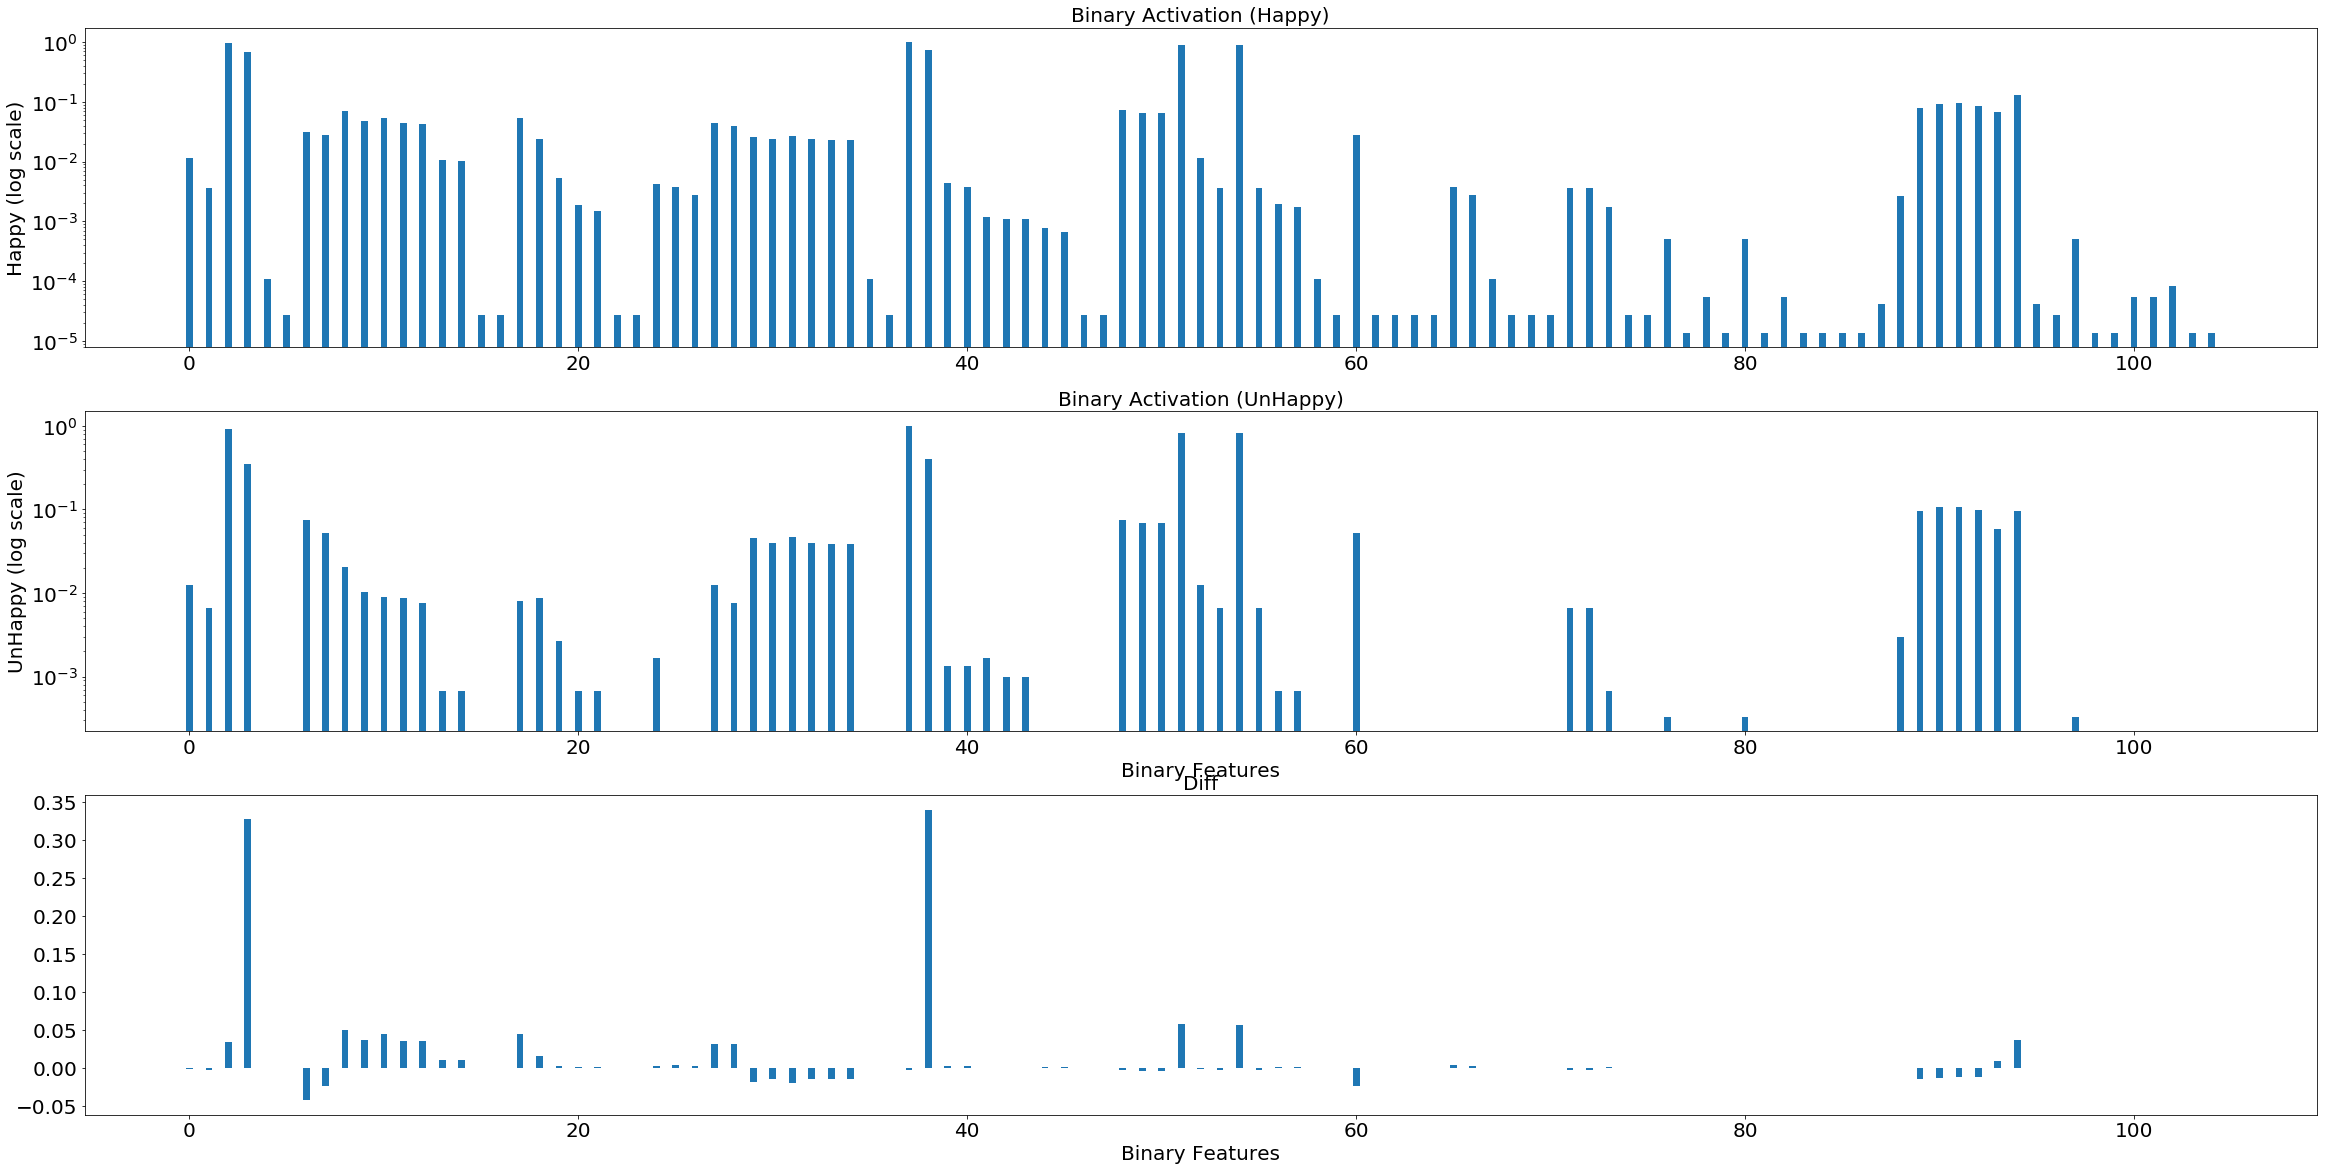

In [12]:
%matplotlib inline

width = .35

ind =range(activation_happy.shape[0])
fig = plt.figure(figsize=(40, 20))
fig.tight_layout() 

ax1 = fig.add_subplot(311)
ax1.bar(ind, activation_happy,width=width,align='center')
ax1.set_yscale("log", nonposy='clip')
plt.title('Binary Activation (Happy)',size=20)
plt.ylabel("Happy (log scale)",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax2 = fig.add_subplot(312,sharex=ax1)
ax2.bar(ind, activation_unhappy,width=width,align='center')
ax2.set_yscale("log", nonposy='clip')
plt.ylabel("UnHappy (log scale)",size=20)
plt.title('Binary Activation (UnHappy)',size=20)
plt.xlabel("Binary Features",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


ax3 = fig.add_subplot(313,sharex=ax1)
ax3.bar(ind, diff_happy_unhappy,width=width,align='center')
plt.title('Diff',size=20)
plt.xlabel("Binary Features",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()




In [13]:
activation_happy_binarized_index = [index for index, item in enumerate(diff_happy_unhappy) if item >0]
activation_unhappy_binarized_index = [index for index, item in enumerate(diff_happy_unhappy) if item <=0]


activation_happy_binarized = np.zeros(diff_happy_unhappy.shape[0])
activation_happy_binarized[activation_happy_binarized_index]=1

activation_unhappy_binarized = np.zeros(diff_happy_unhappy.shape[0])
activation_unhappy_binarized[activation_unhappy_binarized_index]=1

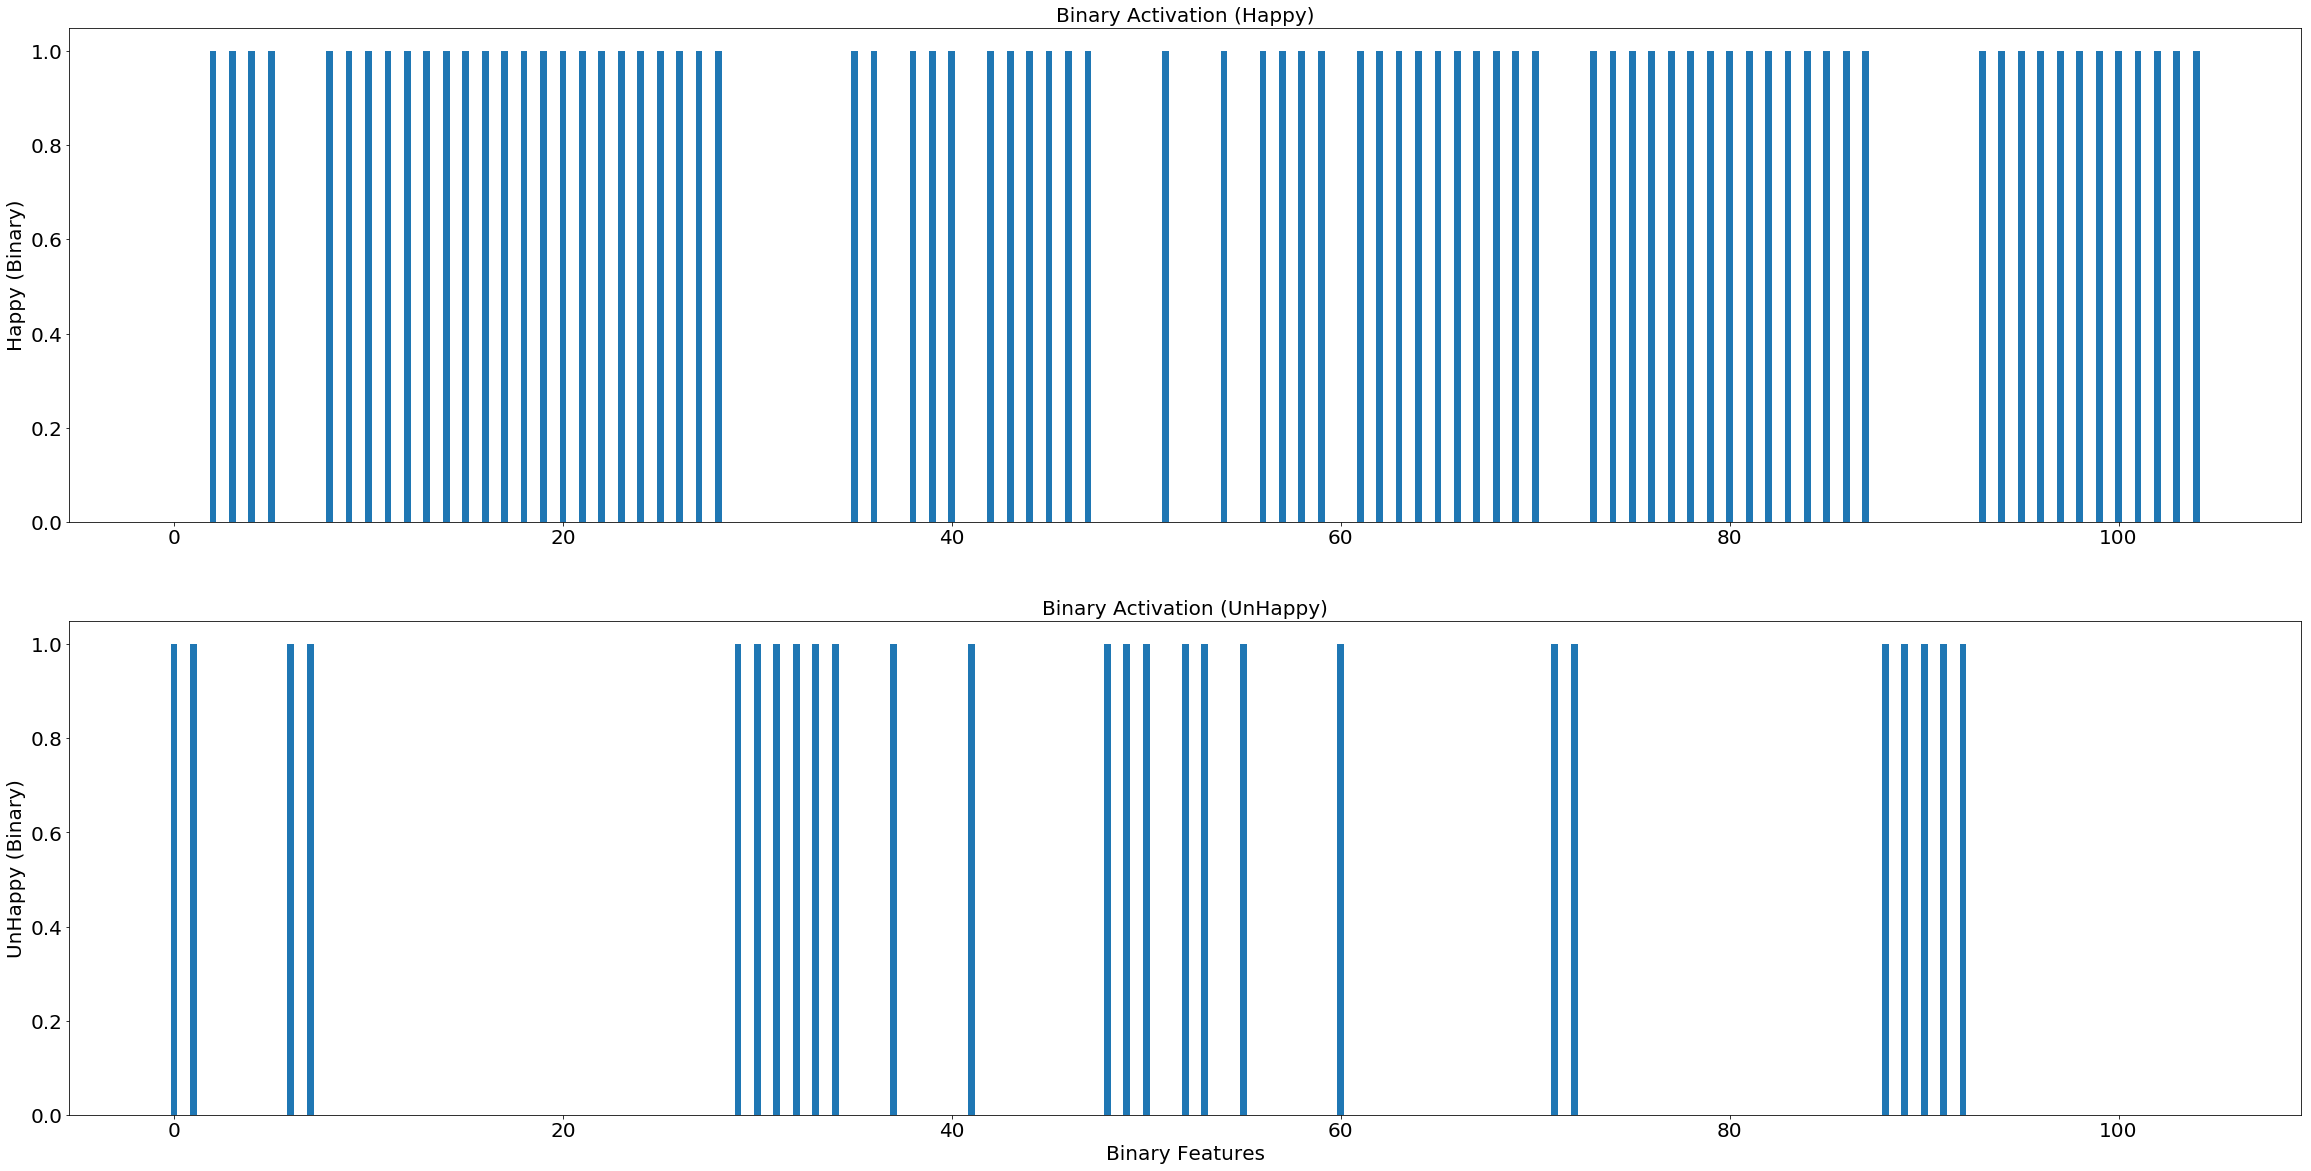

In [14]:
%matplotlib inline

width = .35

ind =range(activation_happy_binarized.shape[0])

fig = plt.figure(figsize=(40, 20))
fig.tight_layout() 

ax1 = fig.add_subplot(211)
ax1.bar(ind, activation_happy_binarized,width=width,align='center')
plt.title('Binary Activation (Happy)',size=20)
plt.ylabel("Happy (Binary)",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax2 = fig.add_subplot(212,sharex=ax1)
ax2.bar(ind, activation_unhappy_binarized,width=width,align='center')
plt.ylabel("UnHappy (Binary)",size=20)
plt.title('Binary Activation (UnHappy)',size=20)
plt.xlabel("Binary Features",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [15]:
test_numbers = 100
count_detected_happy = 0
count_detected_unhappy = 0
for item in range(test_numbers):
    #print('-----------------------')
    happy_array = matrix_happy[np.random.randint(matrix_happy.shape[0]),:].reshape(1, -1)
    unhappy_array =  matrix_unhappy[np.random.randint(matrix_unhappy.shape[0]),:].reshape(1, -1)
    #print('act happy',np.count_nonzero(activation_happy_binarize))
    #print('act unhappy',np.count_nonzero(activation_unhappy_binarize))
    #print('happy array',np.count_nonzero(happy_array))
    #print('unhappy array',np.count_nonzero(unhappy_array))

    #print('sum happyac happy',np.sum(np.logical_and(activation_happy_binarize,happy_array)))
    #print('sum unhappyac happy',np.sum(np.logical_and(activation_unhappy_binarize,happy_array)))
    #print('sum happyac unhappy',np.sum(np.logical_and(activation_happy_binarize,unhappy_array)))
    #print('sum unhappyac unhappy',np.sum(np.logical_and(activation_unhappy_binarize,unhappy_array)))

    test_result_happy =np.sum(np.logical_and(activation_happy_binarized,happy_array))-np.sum(np.logical_and(activation_unhappy_binarized,happy_array))

    if test_result_happy>0:
        #print('Happy Detected')
        count_detected_happy=count_detected_happy+1
    #else:
        #print('Happy Failure')


    test_result_unhappy =np.sum(np.logical_and(activation_happy_binarized,unhappy_array))-np.sum(np.logical_and(activation_happy_binarized,unhappy_array))

    if test_result_unhappy<=0:
        #print('UnHappy Detected')
        count_detected_unhappy=count_detected_unhappy+1

print('Accuracy:',(count_detected_unhappy+count_detected_happy)/(2.0*float(test_numbers)))
print('Accuracy Happy:',(count_detected_happy)/(float(test_numbers)))
print('Accuracy UnHappy:',(count_detected_unhappy)/(float(test_numbers)))


Accuracy: 0.915
Accuracy Happy: 0.83
Accuracy UnHappy: 1.0


In [17]:
test_size_value=0.4
matrix_feature = data_train_only_binary_feature.as_matrix()[:,:-1]

labels = data_train_only_binary_feature.as_matrix()[:,-1]

number_rounds = 3

f1_score_list = []
cm_list = []
cm_max_list = []


rounds = StratifiedShuffleSplit(n_splits=number_rounds, 
                                test_size=test_size_value,
                                random_state=0)

for train_index, test_index in rounds.split(matrix_feature,labels):
    matrix_train = matrix_feature[train_index]
    classes_train = labels[train_index]

    happy_train_matrix= matrix_train[np.where(classes_train==0)[0]]
    unhappy_train_matrix= matrix_train[np.where(classes_train==1)[0]]


    activation_happy = np.sum(happy_train_matrix,axis=0)/happy_train_matrix.shape[0]
    activation_unhappy = np.sum(unhappy_train_matrix,axis=0)/unhappy_train_matrix.shape[0]
    diff_happy_unhappy = activation_happy - activation_unhappy
    activation_happy_binarized_index = [index for index, item in enumerate(diff_happy_unhappy) if item >0]
    activation_unhappy_binarized_index = [index for index, item in enumerate(diff_happy_unhappy) if item <=0]

    activation_happy_binarized = np.zeros(diff_happy_unhappy.shape[0])
    activation_happy_binarized[activation_happy_binarized_index]=1

    activation_unhappy_binarized = np.zeros(diff_happy_unhappy.shape[0])
    activation_unhappy_binarized[activation_unhappy_binarized_index]=1
    matrix_test = matrix_feature[test_index]
    classes_test = labels[test_index]

    activation_happy_binarize_matrix =  np.tile(activation_happy_binarized,(matrix_test.shape[0],1))
    activation_unhappy_binarize_matrix =  np.tile(activation_unhappy_binarized,(matrix_test.shape[0],1))
    
    sum_happy = np.sum(np.logical_and(matrix_test,activation_happy_binarize_matrix),axis=1)
    sum_unhappy=np.sum(np.logical_and(matrix_test,activation_unhappy_binarize_matrix),axis=1)

    diff_happy_unhappy = sum_happy-sum_unhappy

    classes_predicted = np.where(diff_happy_unhappy>0, 0, 1)

    cm = confusion_matrix(classes_test, classes_predicted,labels=[0,1])
    # normalize the confusion matrix
    cm= cm / cm.astype(np.float).sum(axis=1).reshape(-1,1)
    #this threshold is used for plotting 
    thresh = cm.max() / 2.
    cm_list.append(cm)
    cm_max_list.append(thresh)
    #I compute the score taking into account the weighted schema, 
    #which means weighted by the support (the number of true instances for each label)
    precision, recall, fscore, support = score(classes_test, 
                                           classes_predicted,
                                           average='macro')

    f1_score_list.append(fscore)
        

In [18]:
#The score method used in this case is the F1 score, which is the harmonic mean of precision and recall#The sc 
F1_accuracy_str="F1 accuracy: %0.3f (+/- %0.3f)" % (np.mean(f1_score_list),
                                                    np.std(f1_score_list) * 2)
F1_accuracy = np.mean(f1_score_list)
print(F1_accuracy_str)

F1 accuracy: 0.518 (+/- 0.025)


In [19]:
print('Extract (randomly) one confusion matrix (Real vs Prediction) from the previous run: ')
shuffle(cm_list,random_state=15)
cnf_matrix = cm_list[0]
dataframe=pd.DataFrame(cnf_matrix,index=['Real happy',' Real unhappy'],columns=['Predicted happy',' Predicted unhappy'])
pd.set_option('display.float_format', lambda x: '%.4f' % x)
print(dataframe)

Extract (randomly) one confusion matrix (Real vs Prediction) from the previous run: 
               Predicted happy   Predicted unhappy
Real happy              0.8596              0.1404
 Real unhappy           0.7490              0.2510
